In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data= pd.read_csv('/content/drive/MyDrive/datasetsss/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [21]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['State']= le.fit_transform(data['State'])

In [24]:
x= data.drop(['Profit'], axis=1)
y= data['Profit']

In [27]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)

r= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print(r)
print(mse)
print(mae)

0.9000614254946404
80929465.49097767
6979.17574672138


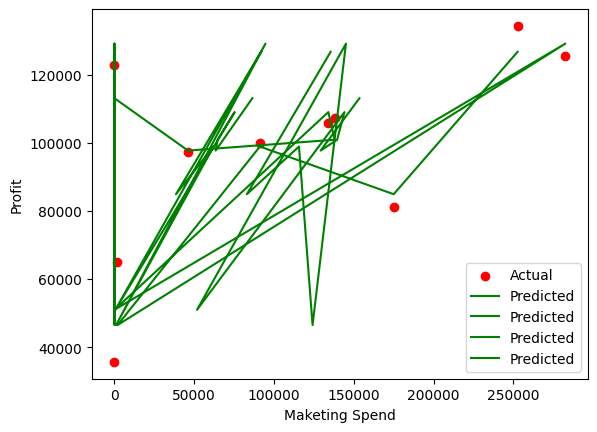

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x_test['Marketing Spend'], y_test, color= 'red', label='Actual')
plt.plot(x_test, y_pred, color='green', label='Predicted')
plt.xlabel('Maketing Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()